<a href="https://colab.research.google.com/github/hardee20-2003/Hardi_IntelliBrain-AI-Driven-Innovations-in-Brain-Tumor-Classification-and-Treatment-Strategies/blob/main/Hardi_Makwana_IntelliBrain_AI_Driven_Innovations_in_Brain_Tumor_Classification_and_Treatment_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IntelliBrain: AI-Driven Innovations in Brain Tumor Classification and Treatment Strategies**

# Section 1: Import Libraries and Set Up Data

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For image processing (grayscale, resizing)

# Section 2: Data Preprocessing and Image Augmentation

In [ ]:
# Step 1: Data Preprocessing and Image Processing

# Image Data Generator with augmentation for Training and Validation
train_data_gen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0,1]
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom
    horizontal_flip=True,     # Flip images horizontally
    validation_split=0.2     # Split data into 80% train and 20% validation
)

# Image Data Generator for Testing (only rescaling)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Section 3: Load Training, Validation, and Test Data

In [ ]:
# Load the training dataset from the "Training" folder
train_data = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_MRI_Images/Training',  # Path to the training dataset directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical', # Multi-class classification
    subset='training'         # Training set (80%)
)

# Load the validation dataset from the "Training" folder
val_data = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_MRI_Images/Training',  # Path to the training dataset directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical', # Multi-class classification
    subset='validation'       # Validation set (20%)
)

# Load the test dataset from the "Testing" folder
test_data = test_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_MRI_Images/Testing',  # Path to the testing dataset directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Section 4: Build the CNN Model

In [ ]:
# Step 3: CNN Model for Tumor Classification and Stage Detection

model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer for multi-class classification (Tumor types + Stages)
model.add(Dense(4, activation='softmax'))  # Adjust as necessary for your classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Section 5: Train the CNN Model

In [ ]:
# Step 4: Train the CNN Model

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=val_data.samples // val_data.batch_size
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 1445s 10s/step - accuracy: 0.4167 - loss: 1.2189 - val_accuracy: 0.5848 - val_loss: 1.0344
Epoch 2/100
  1/142 ━━━━━━━━━━━━━━━━━━━━ 3:27 1s/step - accuracy: 0.5938 - loss: 1.0266

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5938 - loss: 1.0266 - val_accuracy: 0.6667 - val_loss: 0.8567
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.6770 - loss: 0.7952 - val_accuracy: 0.6509 - val_loss: 0.8919
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.5080 - val_accuracy: 0.7143 - val_loss: 0.7835
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.7287 - loss: 0.6819 - val_accuracy: 0.6884 - val_loss: 0.8325
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.8125 - loss: 0.4567 - val_accuracy: 0.7143 - val_loss: 0.9151
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.7628 - loss: 0.6071 - val_accuracy: 0.6795 - val_loss: 0.8300
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6875 - loss: 0.5683 - val_accuracy: 0.8571 - val_loss: 0.5801
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.7832 - loss: 0.5689 - val_accuracy:

# Section 6: Evaluate the Model

In [ ]:
# Step 5: Evaluate the Model

test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 395s 10s/step - accuracy: 0.8709 - loss: 0.4013
Test Accuracy: 88.48%


# Section 7: Image Prediction and Treatment Plan

In [ ]:
# Step 6: Image Prediction and Personalized Treatment Plan

def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read the image
    if img is None:
        raise ValueError(f"Image not found or unable to read: {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    resized_img = cv2.resize(img, (150, 150))  # Resize to 150x150
    img_array = np.array(resized_img) / 255.0  # Normalize the image
    img_array = img_array.reshape(-1, 150, 150, 3)  # Add an extra dimension for 3 channels
    return img_array

def predict_and_treatment_plan(image_path):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]

    class_map = {
        0: "Glioma Early Stage",
        1: "Glioma Mid Stage",
        2: "Glioma Advanced Stage",
        3: "Meningioma Early Stage",
        4: "Meningioma Mid Stage",
        5: "Meningioma Advanced Stage",
        6: "Pituitary Tumor",
        7: "No Tumor"
    }

    tumor_type_stage = class_map[predicted_class]
    print(f"Tumor Type and Stage Detected: {tumor_type_stage}")

    # Personalized treatment plans based on tumor type and stage
    if "Glioma" in tumor_type_stage:
        if "Early Stage" in tumor_type_stage:
            print("Recommended Treatment Plan: Surgery and Observation.")
        elif "Mid Stage" in tumor_type_stage:
            print("Recommended Treatment Plan: Surgery, Radiation Therapy.")
        else:
            print("Recommended Treatment Plan: Aggressive Surgery, Chemotherapy.")
    elif "Meningioma" in tumor_type_stage:
        if "Early Stage" in tumor_type_stage:
            print("Recommended Treatment Plan: Observation, Surgery if needed.")
        else:
            print("Recommended Treatment Plan: Surgery and Radiation Therapy.")
    elif "Pituitary Tumor" in tumor_type_stage:
        print("Recommended Treatment Plan: Surgery, Hormonal Therapy.")
    else:
        print("No tumor detected. Regular check-ups advised.")

# Section 8: Input Multiple Image Paths for Prediction

In [ ]:
# Take user input for multiple image paths
while True:
    image_path = input("Please enter the path of the MRI image (or type 'exit' to stop): ")
    if image_path.lower() == 'exit':
        break
    predict_and_treatment_plan(image_path)

Please enter the path of the MRI image (or type 'exit' to stop): /content/drive/MyDrive/Brain_Tumor_MRI_Images/Testing/Glioma/Te-glTr_0006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Tumor Type and Stage Detected: Glioma Early Stage
Recommended Treatment Plan: Surgery and Observation.
Please enter the path of the MRI image (or type 'exit' to stop): exit


# Section 9: Save the Model

In [ ]:
# Step 8: Save the Model
model.save('brain_tumor_classification_model.h5')

# Section 10: Plot Training and Validation Accuracy, Loss, Testing Accuracy, and Loss

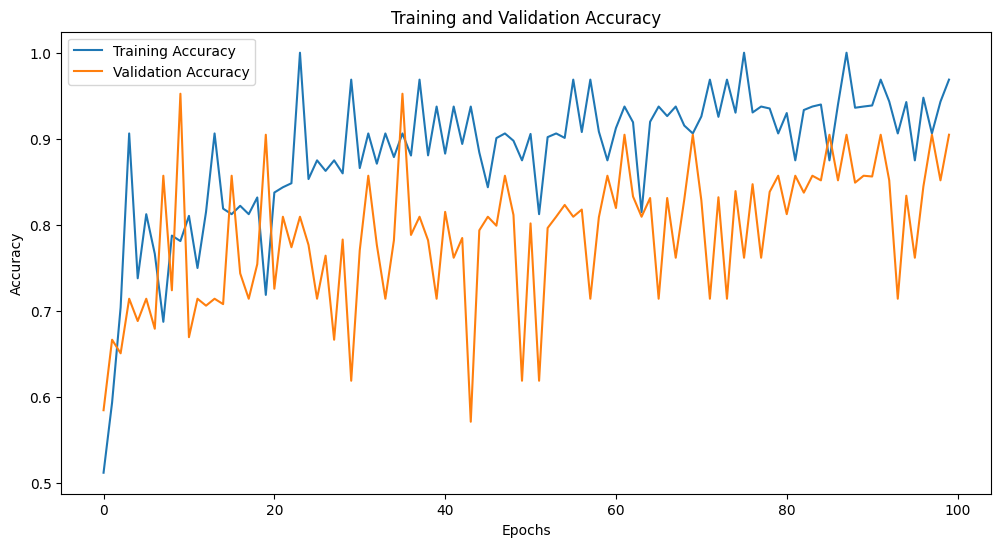

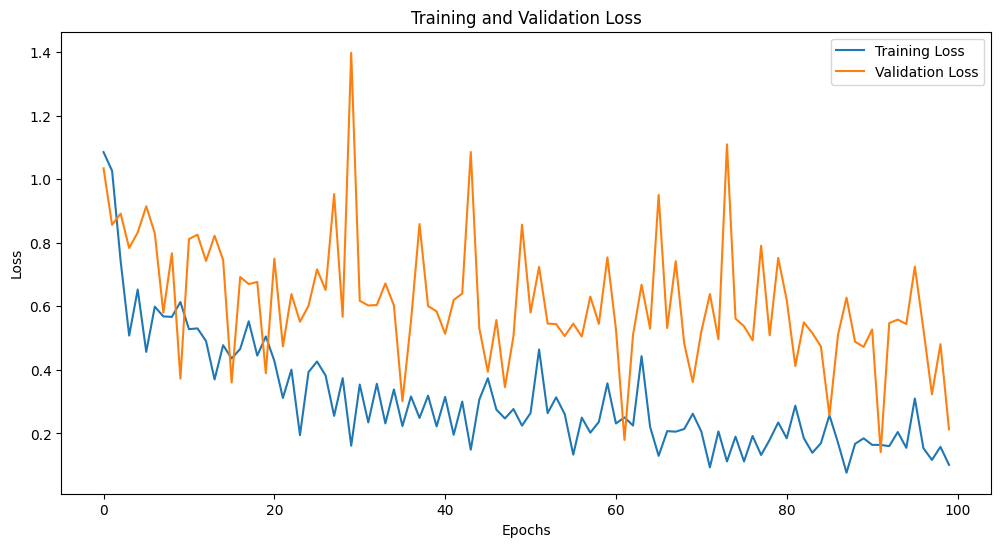

41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 667ms/step - accuracy: 0.8898 - loss: 0.4773
Run 1: Test Accuracy = 88.48%, Test Loss = 0.4450
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 628ms/step - accuracy: 0.8771 - loss: 0.4547
Run 2: Test Accuracy = 88.48%, Test Loss = 0.4450
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 569ms/step - accuracy: 0.8749 - loss: 0.4329
Run 3: Test Accuracy = 88.48%, Test Loss = 0.4450
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 569ms/step - accuracy: 0.8801 - loss: 0.4333
Run 4: Test Accuracy = 88.48%, Test Loss = 0.4450
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 575ms/step - accuracy: 0.8904 - loss: 0.4139
Run 5: Test Accuracy = 88.48%, Test Loss = 0.4450


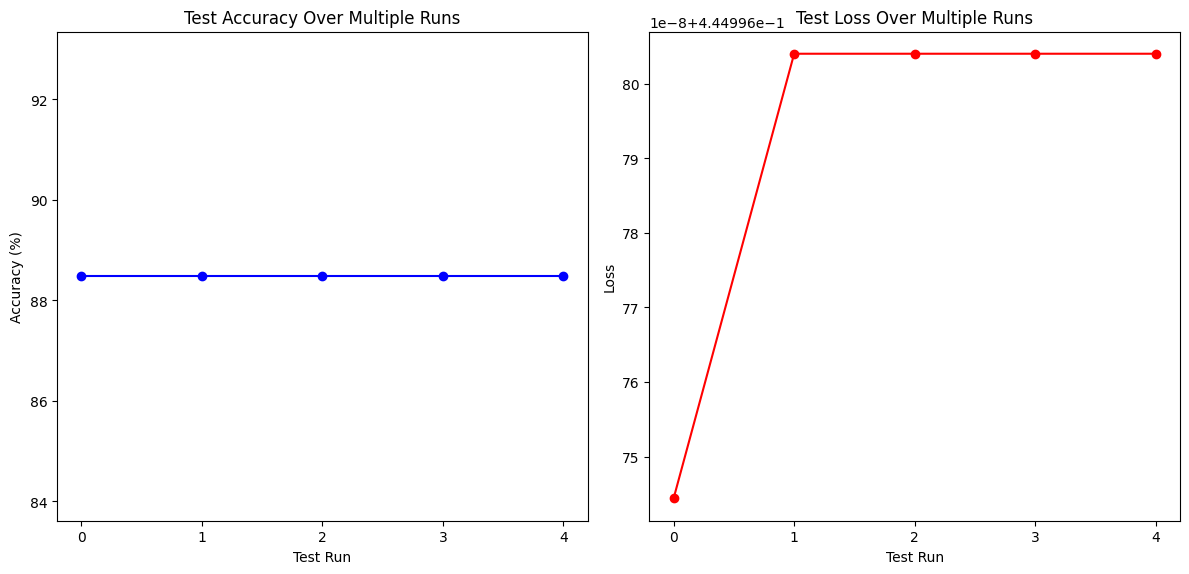

In [ ]:
# Step 9: Plot training and validation accuracy and loss

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Plot Testing Accuracy and Loss over Multiple Runs

test_accuracies = []
test_losses = []

# Evaluate the model multiple times and plot the accuracy/loss for each test run
for i in range(5):  # Change the number of runs if needed
    test_loss, test_accuracy = model.evaluate(test_data)
    test_accuracies.append(test_accuracy * 100)
    test_losses.append(test_loss)
    print(f"Run {i+1}: Test Accuracy = {test_accuracy * 100:.2f}%, Test Loss = {test_loss:.4f}")

# Plot Testing Accuracy and Loss
plt.figure(figsize=(12, 6))

# Plot Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(test_accuracies, 'bo-', label='Test Accuracy')
plt.title('Test Accuracy Over Multiple Runs')
plt.xlabel('Test Run')
plt.ylabel('Accuracy (%)')
plt.xticks(range(len(test_accuracies)))

# Plot Testing Loss
plt.subplot(1, 2, 2)
plt.plot(test_losses, 'ro-', label='Test Loss')
plt.title('Test Loss Over Multiple Runs')
plt.xlabel('Test Run')
plt.ylabel('Loss')
plt.xticks(range(len(test_losses)))

plt.tight_layout()
plt.show()